# Homework 12

- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
- compare to sklearn implementation

In [64]:
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 12,10
np.random.seed(3)

In [65]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron as SklearnPerceptron

iris = load_iris()

In [78]:
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

## Prediction Iris Versicolour "1" vs not Iris Versicolour "0" (Iris Setosa or Iris Virginica)

In [79]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Check accuracy on sklearn perceptron implementation

In [80]:
sklearnPerceptron = SklearnPerceptron()
sklearnPerceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [69]:
print("Sklearn Perceptron Accuracy:",sklearnPerceptron.score(X_test, y_test) * 100, "%") 

Sklearn Perceptron Accuracy: 68.4210526316 %


### Create perceptron from scratch

In [70]:
from sklearn.linear_model import SGDClassifier

class Perceptron:
    def __init__(self, alpha = 0.0001):
        self.alpha = alpha
       
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.sgd = self.sgd()
        
    def sgd(self):
        self.model = SGDClassifier(alpha = self.alpha)
        self.model.fit(self.X, self.y)
        
    def score(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        self.score = self.model.score(X_test, y_test)
        return self.score

In [71]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

In [72]:
print("Accuracy:",perceptron.score(X_test, y_test) * 100, "%")  

Accuracy: 68.4210526316 %


In [73]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

In [74]:
class PerceptronFromScratch:
    def __init__(self, alpha = 0.01, iter = 1000):
        self.alpha = alpha
        self.iter = iter
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        # weights
        self.len, self.width = len(self.y), len(X[0])
        self.weights = list()
        for i in range(self.width):
            self.weights.append(random.random())
        self.bias = random.random()
        self.compute()
        
    def score(self, X_test, y_test):
        counter = 0
        for j in range(len(X_test)):
            y = self.set_poly(X_test[j])
            prediction = sigmoid(y)
            if prediction < .5 and y_test[j] == 0:
                counter += 1
            elif prediction >= .5 and y_test[j] == 1:
                counter += 1
        return counter / len(X_test)
        
    def compute(self):
        dw = list()
        for i in range(self.width):
            dw.append(random.random())
        for i in range(self.iter):
            for j in range(self.len):
                y = self.set_poly(X[j])
                prediction = sigmoid(y)
                diff = prediction - y
                cost = np.square(diff)
                d_cost = 2 * (diff)
                d_pred = sigmoid_p(y)
                d_cost = d_cost * d_pred
                for k in range(self.width):
                    dw[k] = d_cost * self.X[j,k]
                    self.weights[k] -= self.alpha * dw[k]
                db = d_cost
                self.bias -= self.alpha * db
    
    def set_poly(self, X):
        y = 0
        for k in range(len(X)):
            y += X[k] * self.weights[k]
        y += self.bias
        return y

In [75]:
perceptron_v2 = PerceptronFromScratch()
perceptron_v2.fit(X_train, y_train)

In [76]:
print("Accuracy:",perceptron_v2.score(X_test, y_test) * 100, "%")  

Accuracy: 31.57894736842105 %


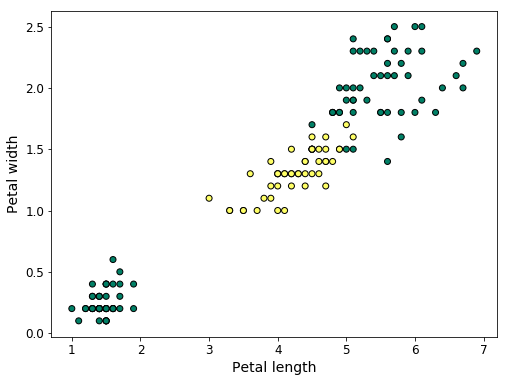

In [77]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()